### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание.


Приготовьтесь, потому что на лекциях и семинарах мы уже прошли через джунгли теории, оттачивая наши навыки в мастерстве оптимизации функционалов. Мы погружались в глубины градиентного спуска, изучая его в каждом возможном амплуа — от классического полного градиента до беспощадного стохастического градиента, не забывая про метод с импульсом, который как боксерский удар прорывается сквозь проблемы оптимизации.

Теперь же перед вами стоит вызов, который не для слабонервных. Ваша миссия, если вы, конечно, осмелитесь ее принять, — взять в арсенал четыре разнообразных вида градиентного спуска и смастерить из них инструмент, способный расправиться с любой задачей. Вам предстоит создать собственную версию линейной регрессии, такую, что даже самые опытные аналитики данных будут смотреть на нее с завистью. Испытайте на реальных данных весь арсенал вашего градиентного спуска, сравните, какой из них выходит на арену оптимизации как несокрушимый чемпион.

Это задание не для тех, кто привык стоять в сторонке. Это ваш момент славы, ваш шанс выйти на арену, где вашим оружием будет код, а противниками — самые коварные задачи машинного обучения. Покажите, на что вы способны, и пусть ваш код станет легендой!

@GPT-4

## Задание 1. Реализация градиентного спуска (1.75 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое размышление № 1

Ключевая характеристика антиградиента заключается в том, что он направлен к самому быстрому уменьшению значения функции в конкретной точке. Исходя из этого, разумным подходом будет начать движение с определенной точки, переместиться в направлении антиградиента, затем вновь вычислить антиградиент, совершить движение и продолжать таким образом. Давайте опишем этот процесс более формализованно.

Предположим, что $w_0$ – это исходный набор параметров (к примеру, набор из нулей или полученный из какого-либо случайного распределения). В этом случае простой градиентный спуск предполагает выполнение следующих действий до достижения сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое размышление № 2

### Задание 0.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

Давайте найдем градиент функции $Q(w)$ по $w$, используя матричное дифференцирование. Функция $Q(w)$ определена как:

$$
Q(w) = \frac{1}{\ell} (y - Xw)^T (y - Xw)
$$

где:
- $Q(w)$ — функция потерь,
- $\ell$ — количество наблюдений


- $y$ — вектор истинных значений,
- $X$ — матрица признаков,
- $w$ — вектор весов.

Градиент функции потерь $Q(w)$ по $w$ находится следующим образом:

1. Раскроем скобки в выражении для $Q(w)$:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - y^TXw - w^TX^Ty + w^TX^TXw)
$$

2. Заметим, что $y^TXw$ и $w^TX^Ty$ представляют собой скаляры и равны между собой. Тогда выражение упрощается до:
   
$$
Q(w) = \frac{1}{\ell} (y^Ty - 2y^TXw + w^TX^TXw)
$$

3. Теперь дифференцируем $Q(w)$ по $w$. При дифференцировании $y^Ty$ как константа относительно $w$ исчезает, а дифференциация оставшейся части дает:

$$
\nabla_w Q(w) = \frac{1}{\ell} (-2X^Ty + 2X^TXw)
$$

4. Упростим выражение, вынеся 2 за скобки:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Таким образом, градиент функции потерь $Q(w)$ по вектору весов $w$ равен:

$$
\nabla_w Q(w) = \frac{2}{\ell} (X^TXw - X^Ty)
$$

Это выражение и есть искомый градиент.

### Задание 1.1. Родительский класс BaseDescent (0.25 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.25 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое размышление № 3

Конечно, давайте переформулируем и перепишем ваш текст для лучшего понимания.

В контексте задач машинного обучения, обычно функционал ошибки $Q(w)$ можно представить как среднее арифметическое отдельных ошибок на каждом элементе выборки:

$$
    Q(w) = \frac{1}{\ell} \sum_{i = 1}^{\ell} q_i(w),
$$

где каждая функция $q_i(w)$ отражает ошибку на i-ом объекте выборки.

Основная сложность применения метода градиентного спуска заключается в необходимости вычисления градиента по всей выборке на каждом шаге. Это может быть особенно затруднительно при работе с большими данными. Однако, для эффективного шага в направлении минимизации функции потерь, абсолютная точность градиента может быть не столь критична.

Мы можем приблизить градиент всей функции, используя среднее значение градиентов для случайно выбранной подвыборки объектов:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|} \sum_{i \in B} \nabla_{w} q_{i}(w_{k}),
$$

где $B$ является подмножеством выборки с случайно выбранными индексами.

Этот подход приводит нас к методу **стохастического градиентного спуска**, который значительно упрощает вычисления и ускоряет процесс обучения, особенно на больших данных.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.25 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое размышление № 4

В процессе оптимизации может случиться так, что направление наискорейшего спуска, определенное антиградиентом, будет резко колебаться от одного шага к другому. Это часто происходит, если функция потерь имеет вытянутые уровни, что приводит к тому, что градиент, всегда перпендикулярный этим линиям, меняет свое направление на противоположное при каждом шаге. Эти колебания могут серьезно замедлить сходимость оптимизационного процесса из-за постоянных "колебаний" в обратных направлениях. Чтобы сгладить эти осцилляции и ускорить процесс оптимизации, применяется метод усреднения градиентов из нескольких предыдущих шагов, тем самым снижая "шум" и выявляя общее предпочтительное направление движения. Это достигается с помощью введения вектора инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}),
\end{align}

где $\alpha$ — коэффициент, контролирующий влияние градиентов предыдущих шагов, уменьшая их вклад со временем. Можно использовать аппроксимацию градиента для вычисления $h_{k + 1}$. Для осуществления следующего шага градиентного спуска текущую точку смещают на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Такой подход позволяет сгладить колебания градиента: если градиент по какому-то направлению часто меняет знак, его вклад в вектор инерции будет уменьшаться, в то время как постоянное направление градиента приведет к увеличению шага в этом направлении, делая процесс оптимизации более стабильным и направленным.

### Задание 1.4 Метод Momentum MomentumDescent (0.25 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическо размышление № 5

Выбор размера шага играет критическую роль в эффективности градиентного спуска. Слишком большой шаг может привести к тому, что процесс будет "перепрыгивать" минимальное значение, а слишком маленький шаг существенно замедлит достижение минимума, требуя большего количества итераций. Предварительно определить идеальный размер шага невозможно, и даже стратегии постепенного его уменьшения могут оказаться неэффективными.

AdaGrad предлагает индивидуальный подход к регулированию длины шага для каждой отдельной компоненты параметров. Суть метода заключается в уменьшении размера шага в зависимости от общей длины предыдущих шагов по данному параметру:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Где $\varepsilon$ — малая добавка для предотвращения деления на ноль.

В AdaGrad размер шага может быть фиксирован с самого начала, исключая необходимость его подбора в процессе. Этот метод особенно эффективен в задачах с разреженными данными, где большинство признаков для объектов равны нулю. Таким образом, большие шаги будут совершаться по редко встречающимся признакам, в то время как по часто встречающимся — маленькие.

Основной недостаток AdaGrad заключается в неизбежном замедлении шагов из-за монотонного роста $G_{kj}$, что может остановить процесс до достижения оптимального решения. Эту проблему решает метод RMSprop, где применяется экспоненциальное сглаживание для градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

Здесь шаг адаптируется в зависимости от интенсивности движения по каждому направлению на недавних итерациях.

Объединяя идеи этих методов, можно достичь эффективного накопления информации о градиентах для стабилизации процесса и внедрить адаптивную длину шага для каждого параметра, обеспечивая более сбалансированное и быстрое приближение к минимуму.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (0.75 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.25 балла)

Ваша задача — создать собственную версию линейной регрессии, которая будет обучаться с помощью метода градиентного спуска, следуя предоставленным шаблонам в файле `linear_regression.py` под классом **LinearRegression**. Главные требования к реализации:

- Используйте векторизацию для всех вычислений, минимизируйте использование циклов в Python, за исключением итераций градиентного спуска.
- Прекращайте обучение, когда выполнено хотя бы одно из следующих условий:
  - Евклидова норма разности векторов весов между двумя последовательными итерациями становится меньше заданного порога `tolerance`.
  - В векторе весов появляются значения NaN.
  - Достигнуто максимальное количество итераций `max_iter`.
- Предполагается, что данные для обучения уже содержат столбец из единиц в качестве последнего столбца, обеспечивающего вектор свободных членов.
- Для отслеживания процесса сходимости используйте массив `loss_history`, куда следует записывать значения функции потерь до начала первого шага градиентного спуска и после каждой итерации, включая итоговое значение после завершения обучения.

## Задание 3. Проверка кода (0 баллов)

In [323]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [324]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [325]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [326]:

descent_config = {
    'descent_name': 'типа что-то делает',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [327]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

## Задание 4. Работа с данными (0.5 балла)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Вам нужно выполнить базовый EDA анализ:

1. **Визуализация распределения целевой переменной**:
    - Постройте график распределения целевой переменной, чтобы оценить его форму.
    - Если распределение сильно скошено, рассмотрите возможность применения логарифмического преобразования к целевой переменной для нормализации распределения.
    - Оцените наличие выбросов, аномально высоких или низких значений целевой переменной, используя графический метод или статистические меры (например, интерквартильный размах).

2. **Удаление выбросов**:
    - Если в данных присутствуют выбросы с аномальной ценой, удалите их, чтобы они не искажали результаты анализа и моделирования.

3. **Исследование данных**:
    - Проанализируйте типы данных в столбцах (категориальные, числовые, текстовые и т.д.).
    - Постройте графики для анализа зависимости целевой переменной от других признаков. Это поможет понять, какие признаки влияют на целевую переменную.
    - Изучите распределения значений признаков для выявления аномалий и выбросов. Определите, какие признаки требуют предварительной обработки или трансформации.
    - На основе графиков и анализа определите, какие признаки кажутся полезными для моделирования.

4. **Предобработка данных**:
    - Определите, какие трансформации данных (например, нормализация, стандартизация, кодирование категориальных переменных) могут быть применены к признакам.
    - Разделите признаки на категории: категориальные, числовые (вещественные) и те, которые не требуют предобработки.

5. **Разделение данных на выборки**:
    - Разделите ваши данные на обучающую, валидационную и тестовую выборки в пропорции 8:1:1. Это важный шаг для оценки производительности модели и избежания переобучения.



In [328]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [329]:
data = pd.read_csv('autos.csv')

In [330]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

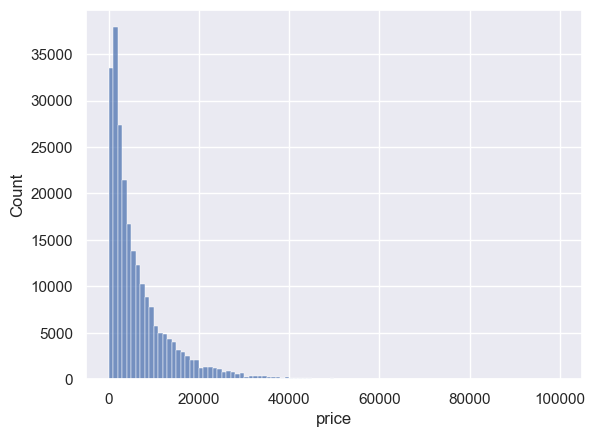

In [331]:
sns.histplot(data['price'], bins=100)
plt.show() 

- Распределение кажется нормальным
- "Высокие" цены сгруппированы в узком диапазоне
- Добавим логарифм цен для детального изучения этого диапазона

Размер всей выборки: 241190
Размер выборки без выбросов: 241190


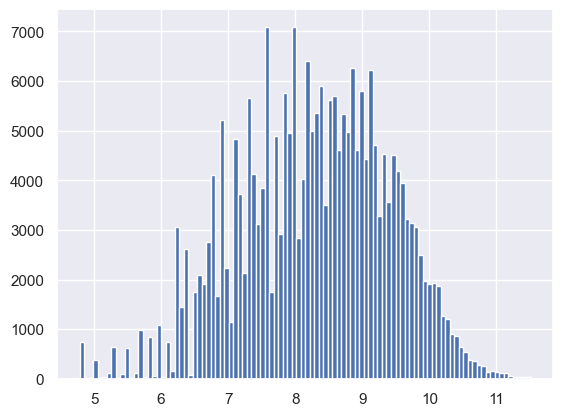

In [332]:
data['log_price'] = np.log(data['price'])
df1 = data['log_price'].clip(lower=data['log_price'].mean() - 3 * data['log_price'].std(), 
                              upper=data['log_price'].mean() + 3 * data['log_price'].std())
print('Размер всей выборки:', data.shape[0])
print('Размер выборки без выбросов:', df1.shape[0])
plt.hist(df1, bins=100)
None

- Выбросов нет

In [333]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              241190 non-null  object 
 1   model              241190 non-null  object 
 2   vehicleType        241190 non-null  object 
 3   gearbox            241190 non-null  object 
 4   fuelType           241190 non-null  object 
 5   notRepairedDamage  241190 non-null  object 
 6   powerPS            241190 non-null  int64  
 7   kilometer          241190 non-null  int64  
 8   autoAgeMonths      241190 non-null  int64  
 9   price              241190 non-null  int64  
 10  log_price          241190 non-null  float64
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ MB


,powerPS,kilometer,autoAgeMonths,price,log_price
count,241190.000000,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892,8.264639
std,60.622613,39825.955933,73.092598,8024.451993,1.158965
min,51.000000,5000.000000,1.000000,1.000000,0.000000
25%,90.000000,100000.000000,92.000000,1750.000000,7.467371
50%,120.000000,150000.000000,140.000000,4100.000000,8.318742
75%,160.000000,150000.000000,192.000000,8999.000000,9.104869
max,589.000000,150000.000000,600.000000,99999.000000,11.512915


**BRAND**

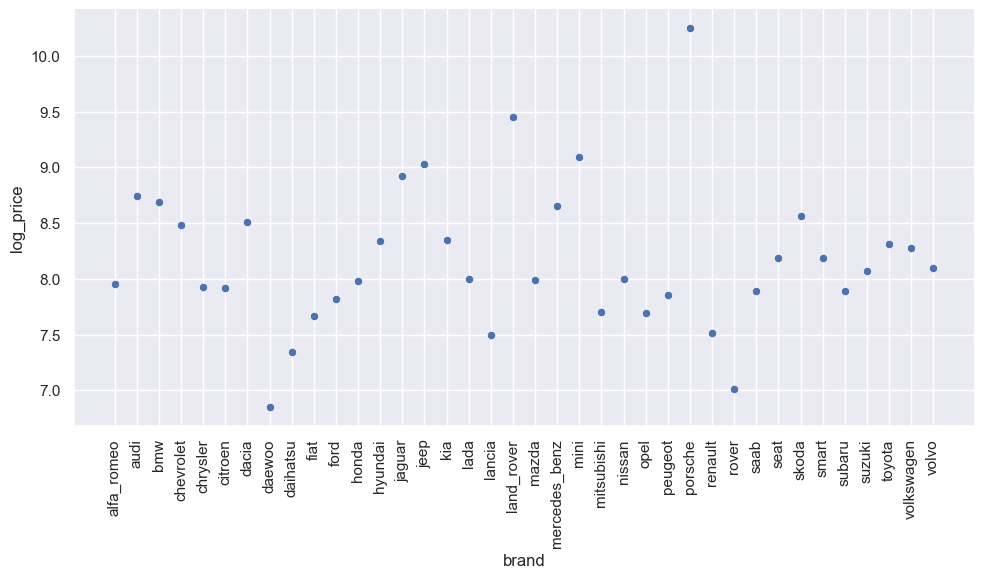

In [334]:
x = data.groupby('brand')['log_price'].mean().index.values
y = data.groupby('brand')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2)
plt.xlabel('brand')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
None 

- Исходя из графика мы можем сделать вывод что скорее всего 'brand' категориальный

**Model**

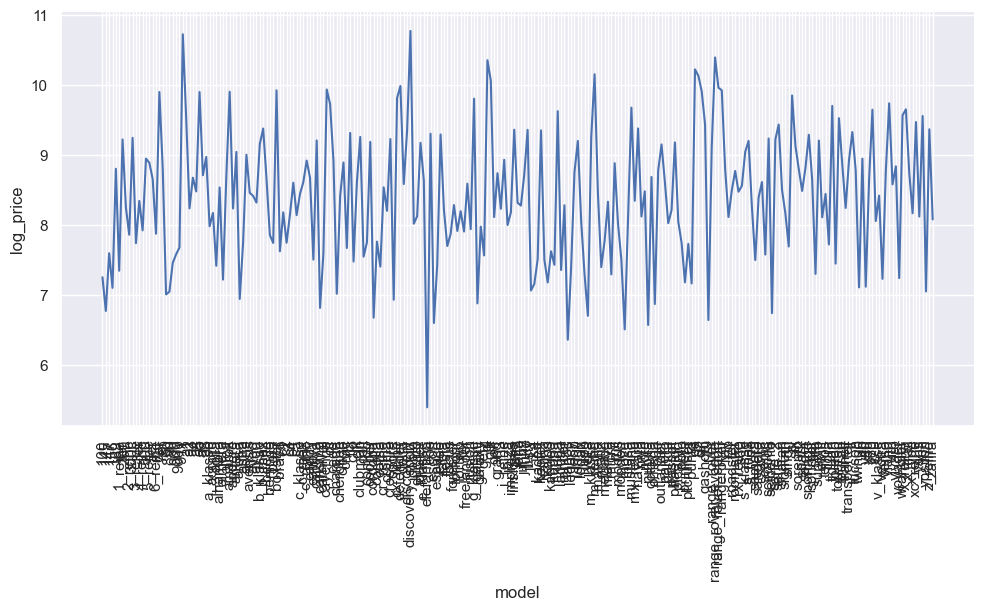

In [335]:
x = data.groupby('model')['log_price'].mean().index.values
y = data.groupby('model')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('model')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
None

- Наверное изначально было понятно, что рассматривать модель как признак сомнительная идея, т.к моделей слишком много и получится высокая размерность, а так же не видно зависимости данных

**VehicleType**

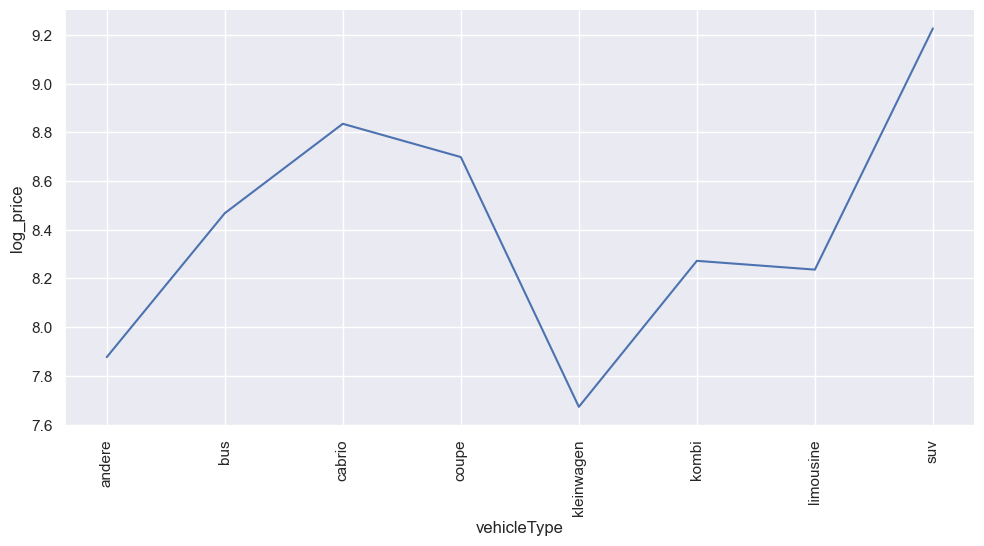

In [336]:
x = data.groupby('vehicleType')['log_price'].mean().index.values
y = data.groupby('vehicleType')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('vehicleType')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
None

- Тип транспортного средства тоже категориальный признак

**Gearbox**

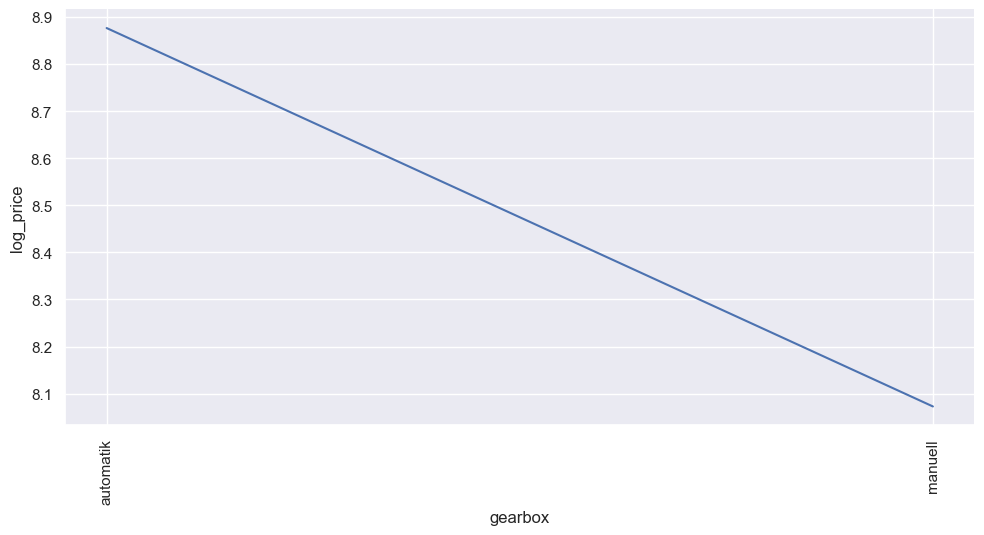

In [337]:
x = data.groupby('gearbox')['log_price'].mean().index.values
y = data.groupby('gearbox')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('gearbox')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

- Тип трансмисcии это бинарный признак т.к всего 2 значения

**FuelType**

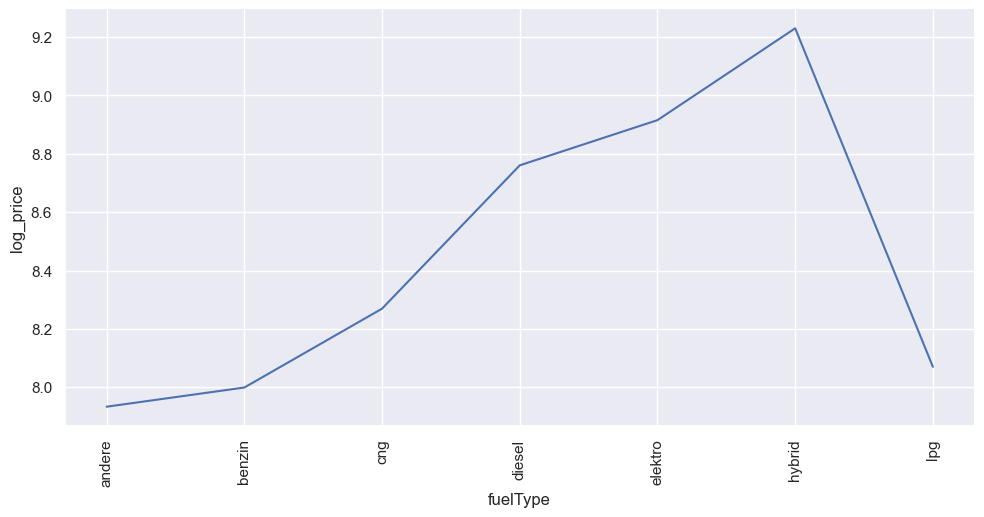

In [338]:
x = data.groupby('fuelType')['log_price'].mean().index.values
y = data.groupby('fuelType')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('fuelType')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

- Вид топлива тоже очевидно категориальный признак

**NotRepairedDamage**


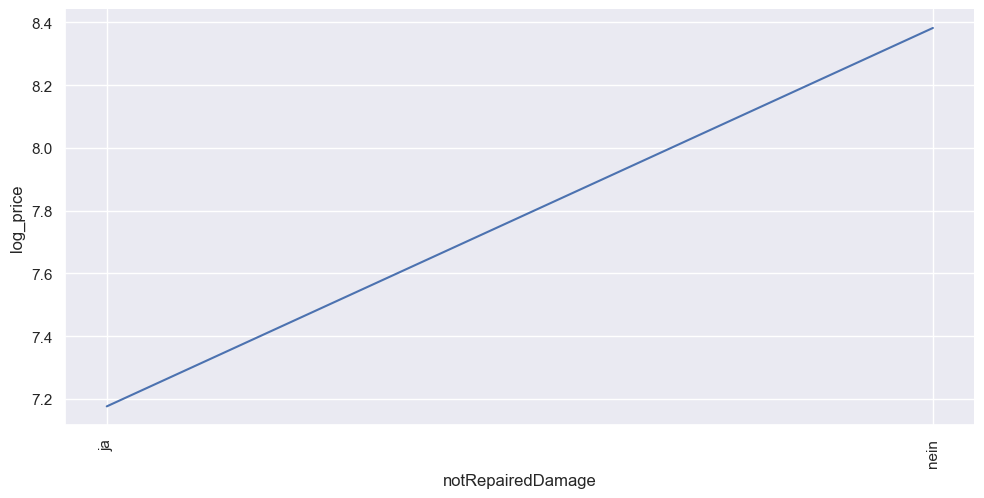

In [339]:
x = data.groupby('notRepairedDamage')['log_price'].mean().index.values
y = data.groupby('notRepairedDamage')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('notRepairedDamage')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

- Есть ли не исправность в автомобиле тоже очевидно, что бинарный признак

**PowerPS**


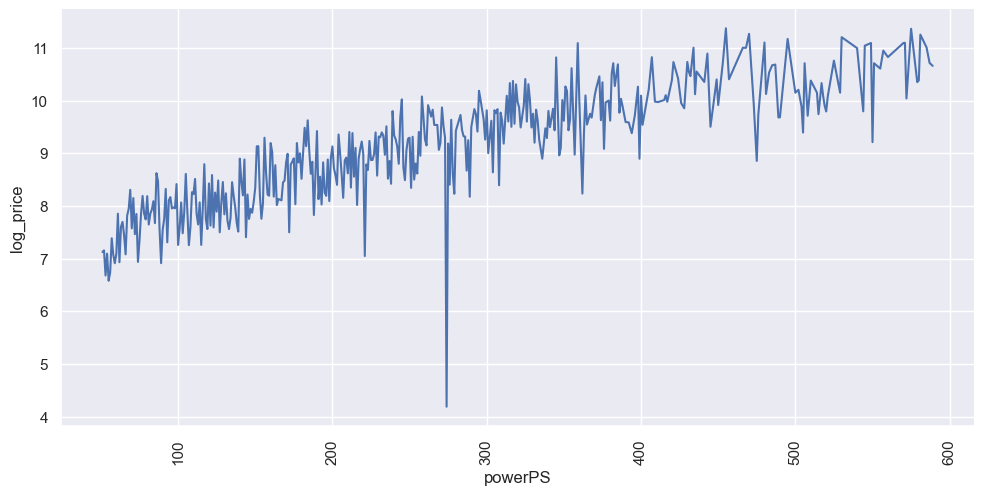

In [340]:
x = data.groupby('powerPS')['log_price'].mean().index.values
y = data.groupby('powerPS')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('powerPS')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

<Axes: ylabel='powerPS'>

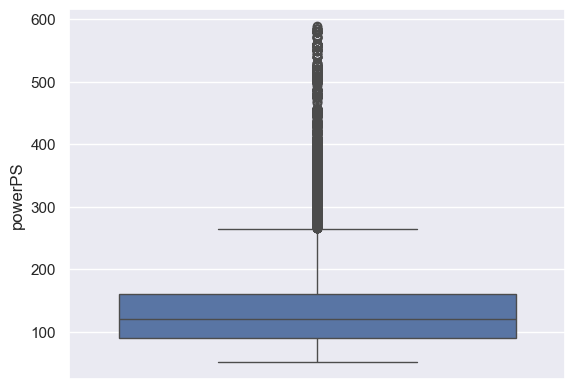

In [341]:
sns.boxplot(y = data['powerPS'], data = data)

- Судя по графикам у нас есть выбросы, которые могут негативно сказаться на нашей модели, и предлагаю их убрать с помощью IQR

<Axes: ylabel='powerPS'>

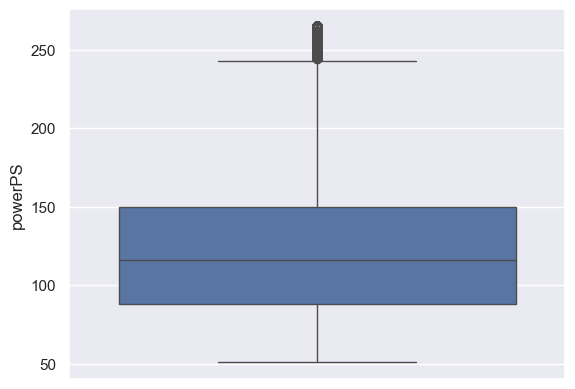

In [342]:
Q1 = data['powerPS'].quantile(0.25)
Q3 = data['powerPS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df1 = data[(data['powerPS'] >= lower_bound) & (data['powerPS'] <= upper_bound)]

sns.boxplot(y = df1['powerPS'], data = data)


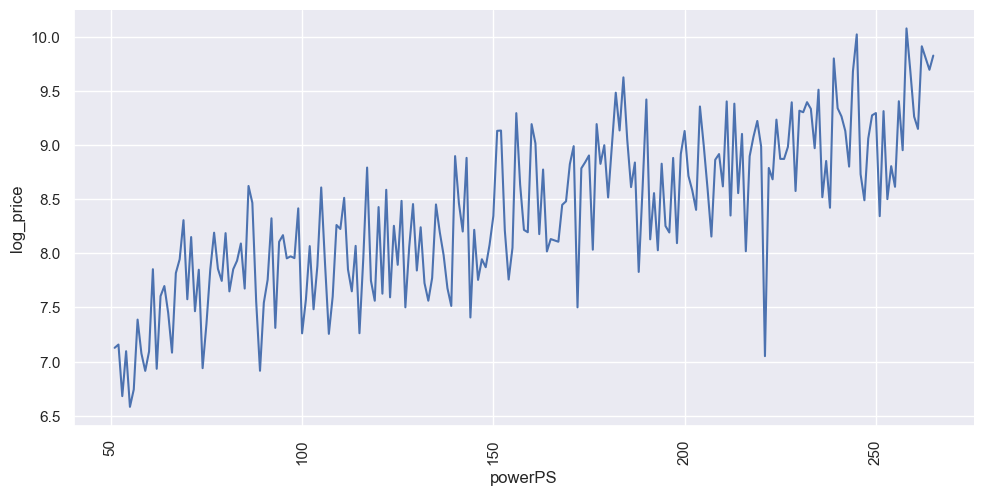

In [343]:
x = df1.groupby('powerPS')['log_price'].mean().index.values
y = df1.groupby('powerPS')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('powerPS')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

In [344]:
data = df1

**Kilometer**


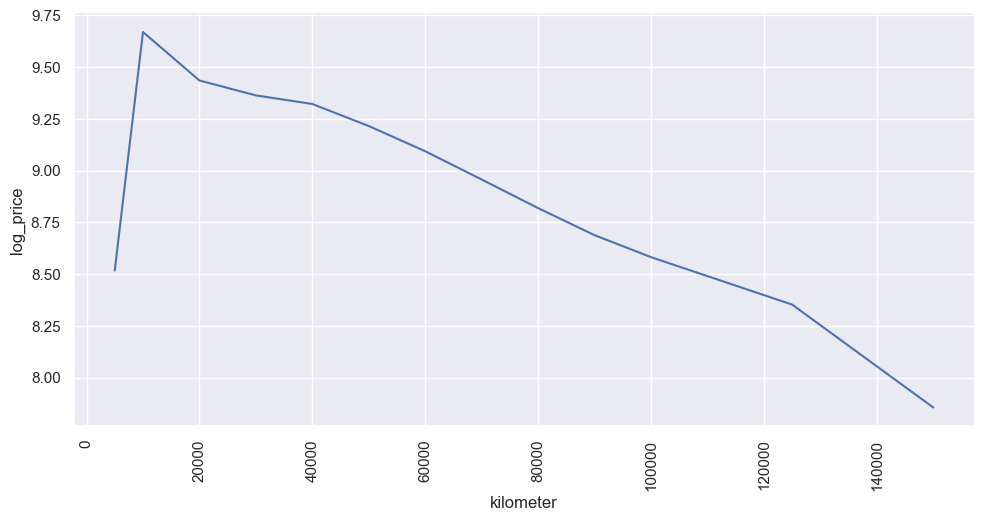

In [345]:
x = data.groupby('kilometer')['log_price'].mean().index.values
y = data.groupby('kilometer')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('kilometer')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

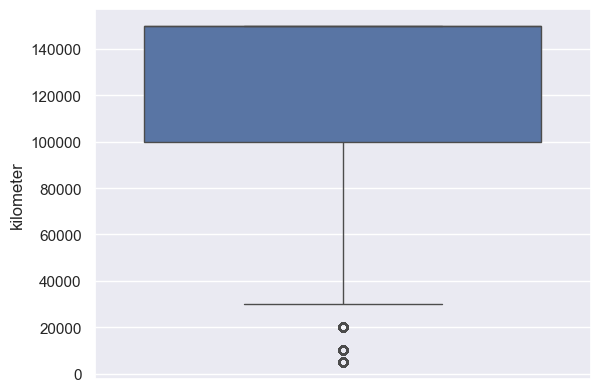

In [346]:
sns.boxplot(y = df1['kilometer'], data = data)
None

- Судя по графику тут всего 3 выброса, думаю их можно оставить)

**AutoAgeMonths**

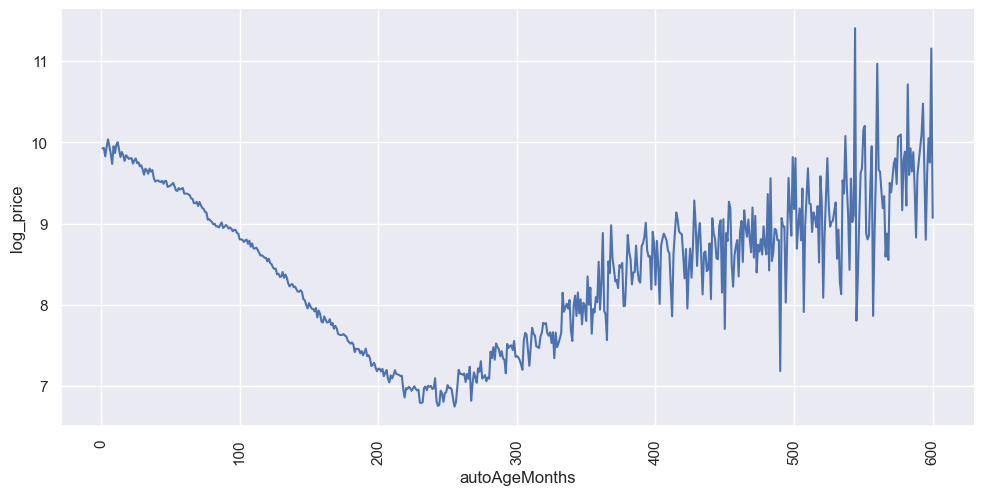

In [347]:
x = data.groupby('autoAgeMonths')['log_price'].mean().index.values
y = data.groupby('autoAgeMonths')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('autoAgeMonths')
plt.ylabel('log_price')
plt.xticks(rotation = 90)

None

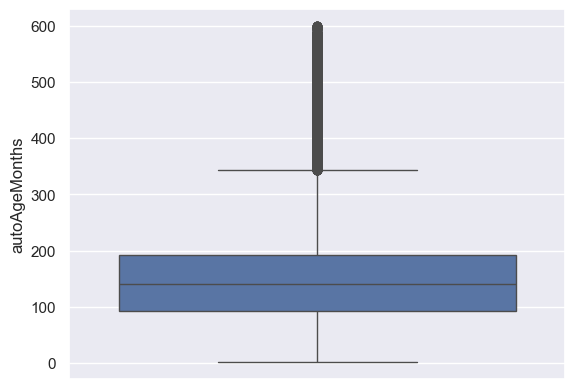

In [348]:
sns.boxplot(y = df1['autoAgeMonths'], data = data)
None

- Тут так же наблюдаются выбросы, их надо убрать)

<Axes: ylabel='autoAgeMonths'>

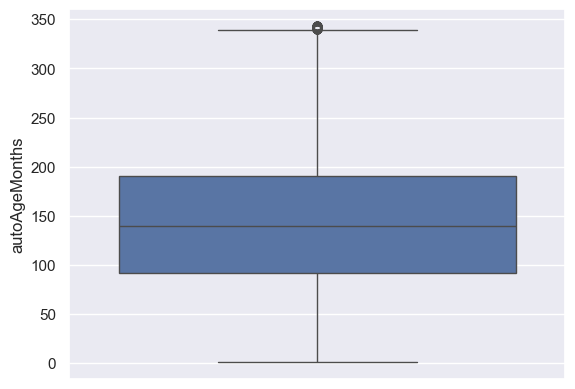

In [349]:
Q1 = data['autoAgeMonths'].quantile(0.25)
Q3 = data['autoAgeMonths'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = data[(data['autoAgeMonths'] >= lower_bound) & (data['autoAgeMonths'] <= upper_bound)]

sns.boxplot(y = df2['autoAgeMonths'], data = data)


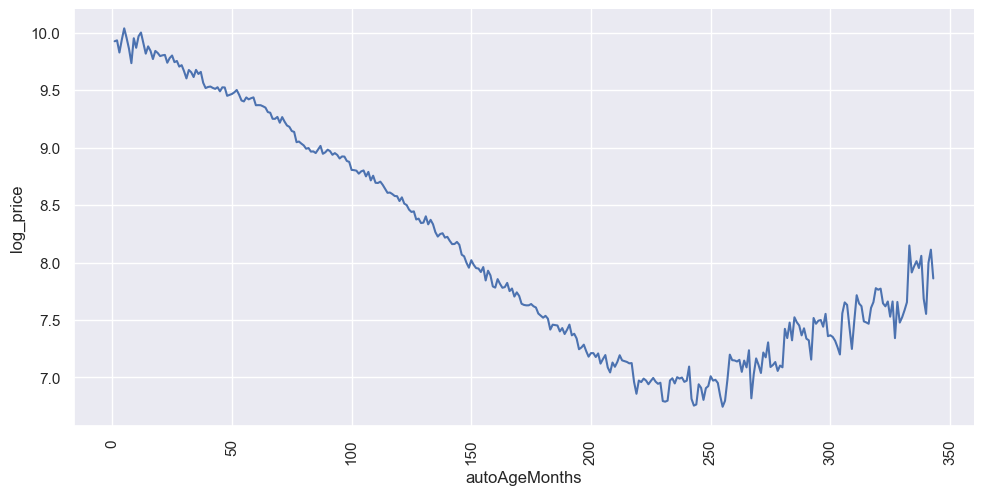

In [350]:
x = df2.groupby('autoAgeMonths')['log_price'].mean().index.values
y = df2.groupby('autoAgeMonths')['log_price'].mean().values

sns.relplot(x = x, y = y, aspect=2, kind="line")
plt.xlabel('autoAgeMonths')
plt.ylabel('log_price')
plt.xticks(rotation = 90)
None


In [351]:
data = df2

После анализа признаков мы можем определить их типы
- `kilometer` - численный
- `powerPS` - численный 
- `notRepairedDamage`  - бинарный 
- `fuelType` - категориальный 
- `gearbox` - бинарный 
- `brand` - категориальный 
- `vehicleType` - категориальный 
- `autoAgeMonths` - численный

Так как признаки `notRepairedDamage` и `gearbox` бинарные (т.е могут приниммать только 2 значения) нам нужно перевести их в числовые 1 и 0.



In [352]:
data['gearbox'] = data['gearbox'].replace({'manuell' : 0, 'automatik' : 1})
data['notRepairedDamage'] = data['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})


/var/folders/tk/nr9bkbqx7y938x1b70qqyh0r0000gn/T/ipykernel_40479/1104705508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gearbox'] = data['gearbox'].replace({'manuell' : 0, 'automatik' : 1})
/var/folders/tk/nr9bkbqx7y938x1b70qqyh0r0000gn/T/ipykernel_40479/1104705508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['notRepairedDamage'] = data['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})


In [353]:
categorical = ['brand', 'vehicleType', 'fuelType']
numeric = ['kilometer', 'powerPS', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

In [354]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

/var/folders/tk/nr9bkbqx7y938x1b70qqyh0r0000gn/T/ipykernel_40479/3698194411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bias'] = 1


In [355]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [356]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

print(X_train.shape[0], X_val.shape[0], X_test.shape[0])

184404 23051 23051


## Задание 5. Сравнение методов градиентного спуска (1 балл)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.5 балла)

Процесс выбора наиболее подходящего размера шага $\lambda$ для различных методов, с учетом валидационного набора данных, предполагает выполнение следующих шагов:

1. **Определение диапазона для $\lambda$**: Начните с выбора диапазона значений $\lambda$, используя логарифмическую сетку от $10^{-4}$ до $10^1$, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Перебор значений $\lambda$**: Для каждого значения из выбранной сетки $\lambda$:
   - Произведите обучение модели на обучающем наборе данных.
   - Вычислите ошибку на обучающем и валидационном наборах данных.
   - Определите значение метрики $R^2$ как на обучающем, так и на валидационном наборах.
   - Зафиксируйте количество итераций, необходимое для достижения сходимости.

3. **Оценка полученных результатов**:
   - Составьте графики, отображающие зависимость ошибки от количества итераций для каждого значения $\lambda$ по всем рассматриваемым методам.
   - Сравните методы на основе скорости сходимости, размера ошибки и значения метрики $R^2$ на различных наборах данных.

4. **Выбор наилучшего $\lambda$**: Исходя из проведенного анализа, определите наиболее подходящее значение $\lambda$ для каждого метода, обеспечивающее оптимальное сочетание скорости сходимости и качества модели на валидационной выборке.

5. **Формулировка выводов**: Подведите итоги, указав, какой метод показал наилучшую производительность с точки зрения соотношения скорости сходимости к качеству предсказаний. Также отметьте, как изменение $\lambda$ влияет на результаты каждого из методов.



In [357]:
from sklearn.metrics import r2_score
import math

all_lambda = np.logspace(-4, 1, 20)
all_methods = ['full', 'stochastic', 'momentum', 'adam']

r2 = []
iters = []
lambda_for_methods = []
all_errs = []
to_add = all_lambda[0]

for method_now in all_methods:
  best_r2, best_r2_train, best_r2_test, best_iters, loss = -1000, 0, 0, 301, []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) 
        best_r2_test = r2_score(y_test, regr.predict(X_test)) 
        best_iters = len(regr.loss_history) 
        to_add = lambda_now
        best_r2 = now_r2
        regr.fit(X_train, y_train.to_numpy())
        loss = regr.loss_history 
  lambda_for_methods.append(to_add)
  r2.append(best_r2_train)
  r2.append(best_r2_test)
  iters.append(best_iters)
  all_errs.append(loss)


In [358]:
print('Значение метрик R²:')
for i, method_name in enumerate(all_methods):
    print(method_name)
    print('r2_train =', r2[i * 2])
    print('r2_test =', r2[i * 2 + 1])
    print('\n')
    
print('Количество итераций до сходимости:')
iters_dict = {'full': iters[0], 'stochastic': iters[1], 'momentum': iters[2], 'adam': iters[3]}
for method_name, iter_count in iters_dict.items():
    print(method_name + ':', iter_count)


Значение метрик R²:
full
r2_train = 0.7630206586145614
r2_test = 0.7646979303277247


stochastic
r2_train = 0.7527666120457261
r2_test = 0.7537704655681241


momentum
r2_train = 0.7673667628792934
r2_test = 0.7690179824135688


adam
r2_train = 0.773554003518784
r2_test = 0.7754111666927426


Количество итераций до сходимости:
full: 77
stochastic: 301
momentum: 100
adam: 88


In [359]:
lambda_for_methods

[2.9763514416313193, 0.8858667904100823, 0.8858667904100823, 1.623776739188721]

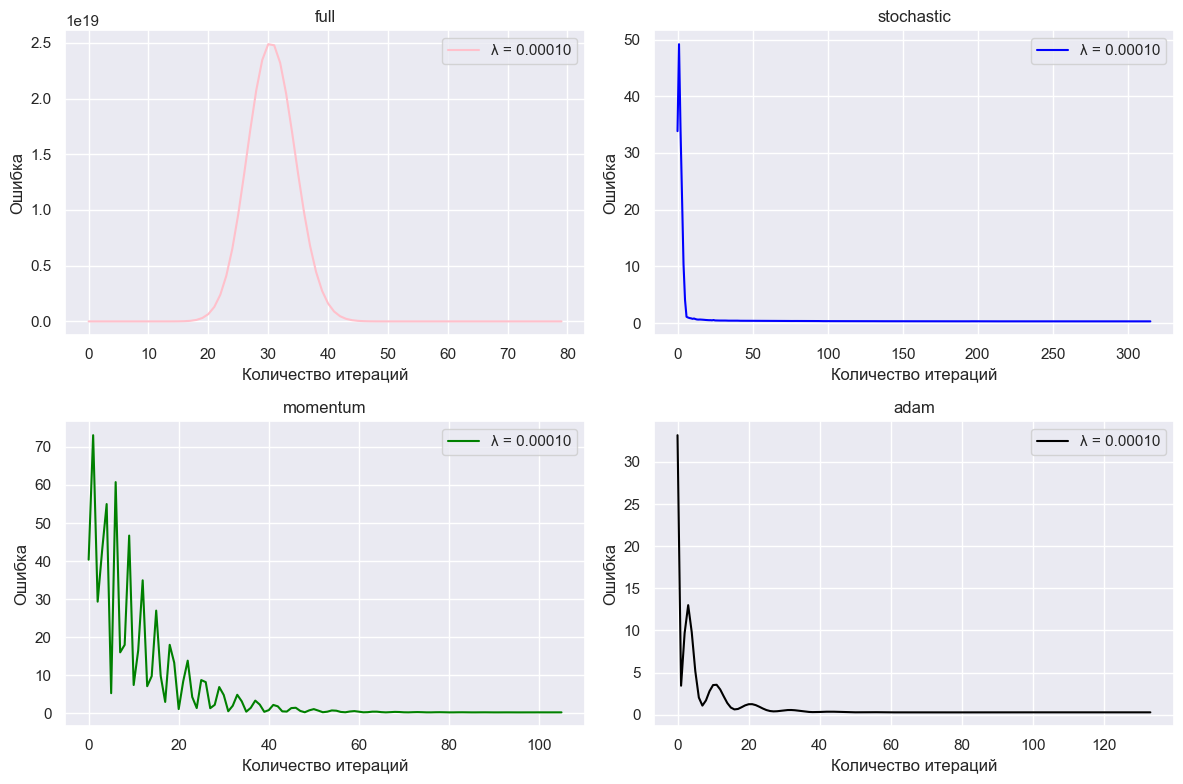

In [360]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.plot(all_errs[i], color=['pink', 'blue', 'green', 'black'][i])
    ax.set_title(all_methods[i])
    ax.set_xlabel('Количество итераций')
    ax.set_ylabel('Ошибка')
    ax.legend(['λ = {:.5f}'.format(lambda_val) for lambda_val in all_lambda])

plt.tight_layout()
plt.show()


- Исходя из графиков лучшее значения сходимости, как и ожидалось у `Momentum` и `Adam`. Увеличение. $\lambda$ может снизить переобучение, но уменьшить способность к обобщению, в то время как уменьшение 
$\lambda$ может увеличить гибкость модели, но увеличить риск переобучения.

### Задание 5.2. Сравнение методов (0.5 балла)

Создайте график, на котором будет показана динамика изменения ошибки на обучающей выборке в зависимости от номера итерации для каждого из рассматриваемых методов. Разместите линии, представляющие каждый метод, на одном и том же графике для наглядного сравнения.

После анализа результатов, представленных в виде графика и таблиц с метриками, выполните сравнение методов. Обратите внимание на следующие аспекты:
- Как быстро каждый метод сходится к минимуму ошибки.
- Величину ошибки на обучающей и тестовой выборках для каждого метода.
- Значение метрики $R^2$ для каждого метода на обучающей и тестовой выборках.
- Количество итераций, необходимых для достижения сходимости.

На основе этих данных сделайте вывод о преимуществах и недостатках каждого из методов в контексте вашей задачи.

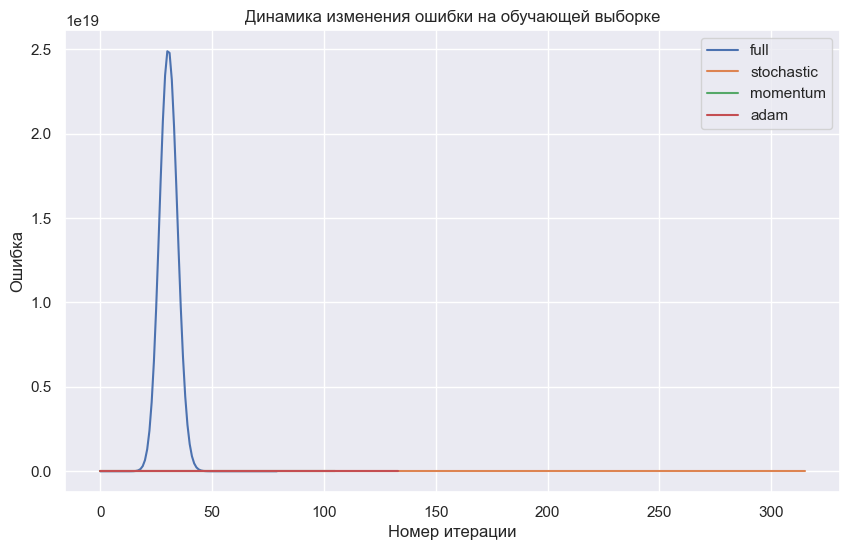

In [361]:
errors = []

plt.figure(figsize=(10, 6))

for i in range(4):
    errors.append(all_errs[i])
    
    plt.plot(range(len(errors[i])), errors[i], label=all_methods[i])

plt.title('Динамика изменения ошибки на обучающей выборке')
plt.xlabel('Номер итерации')
plt.ylabel('Ошибка')
plt.legend()

plt.show()

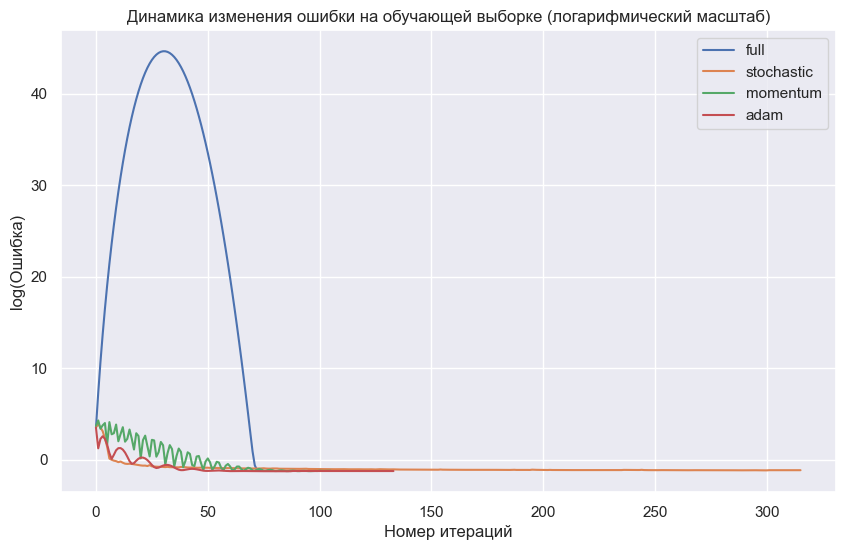

In [362]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(all_methods)):
    errors = all_errs[i]
    
    log_errors = [math.log(e) for e in errors]

    ax.plot(log_errors, label=all_methods[i])

ax.set_xlabel('Номер итераций')
ax.set_ylabel('log(Ошибка)')
ax.set_title('Динамика изменения ошибки на обучающей выборке (логарифмический масштаб)')
ax.legend()

plt.show()

- Полный градиентный спуск (full) эффективен при малом объеме данных, но требует значительных вычислительных ресурсов. Стохастический градиентный спуск (stochastic) быстрее сходится на начальных этапах обучения, но может привести к непостоянству на поздних этапах. Градиентный спуск с моментом (momentum) ускоряет сходимость и сглаживает колебания, но требует настройки параметров. Адаптивный градиентный спуск (Adam) комбинирует преимущества предыдущих методов и адаптивно регулирует скорость обучения, что делает его более универсальным, но требует больше вычислительных ресурсов и параметров для настройки.

## Задание 6. Стохастический градиентный спуск и размер батча (0.5 балла)

Ваша задача — исследовать, как размер батча влияет на процесс обучения при использовании стохастического градиентного спуска (SGD). Выполните следующие шаги:

1. **Выбор размеров батча**: Определите ряд значений для размера батча, которые вы хотите исследовать. Это могут быть, например, %1$, $10$, $50$, $100$, $500$, и так далее.

2. **Многократные запуски для каждого размера батча**: Для каждого выбранного размера батча проведите $k$ независимых запусков стохастического градиентного спуска на обучающей выборке. $k$ может быть равно, например, $10$. Для каждого запуска замерьте:
   - Время обучения в секундах до достижения сходимости.
   - Количество итераций (шагов), необходимых для сходимости.

3. **Вычисление средних значений**: Рассчитайте среднее время обучения и среднее количество итераций до сходимости для каждого размера батча.

4. **Построение графиков**:
   - Постройте график, показывающий зависимость среднего количества итераций до сходимости от размера батча.
   - Постройте график, показывающий зависимость среднего времени обучения от размера батча.

5. **Анализ результатов**: Оцените, как размер батча влияет на скорость и эффективность обучения. Сделайте выводы о том, какой размер батча может быть оптимальным с точки зрения баланса между временем обучения и количеством итераций до сходимости.

Этот эксперимент поможет вам лучше понять влияние размера батча на процесс обучения стохастического градиентного спуска и как этот параметр можно настроить для улучшения производительности обучения.

In [363]:
import time
import timeit

batch_sizes = np.arange(5, 500, 10)

times = np.zeros(50)
iters = np.zeros(50)

k = 10

lambda_full = lambda_for_methods[0]
lambda_stochastic = lambda_for_methods[1]
lambda_momentum = lambda_for_methods[2]
lambda_adam = lambda_for_methods[3]

for i in range(k):
  times_now = []
  iters_now = []

  for batch_now in batch_sizes:
    start = time.time()

    descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'lambda_': lambda_stochastic,
        'dimension': X_train.shape[1],
        'batch_size': batch_now}}
    descent = get_descent(descent_config)
    regr = LinearRegression(descent_config=descent_config)
    regr.fit(X_train, y_train.to_numpy())

    finish = time.time()

    times_now.append(finish - start)
    iters_now.append(len(regr.loss_history))

  times += times_now
  iters += iters_now

times *= (1 / 10)
iters *= (1 / 10)

In [364]:
print ('Среднее значение времени для каждого батча:')  
print (times)

print ('Cреднее значение количества итераций для каждого батча:') 
print (iters)

Среднее значение времени для каждого батча:
[ 2.64045448  2.63667483  2.56357107  2.5855484   2.36594226  2.39755731
  1.90875731  1.88922296  1.89727688  4.30115736  1.71368225  1.44984727
  1.73074934  1.54027343  1.30619395  1.29758182  1.07132466  1.29332991
  1.09631357  1.08953397 18.32541912  1.16052105  1.10761955  1.10972533
  1.02116339  1.13311906  1.07673962  0.97109883  1.05398185  0.94952869
  1.012029    0.99909623  0.90089917  0.90118897  0.93695345  0.91702087
  0.90369866  0.87669029  0.85118999  0.90080791  0.87706654  0.86485338
  0.8224169   0.79685528  0.87667289  0.79771752  0.81524527  0.81317132
  0.80214095  0.74023726]
Cреднее значение количества итераций для каждого батча:
[301.  301.  292.3 291.4 267.8 272.9 215.5 210.  211.2 199.3 191.9 164.
 193.4 173.8 148.1 147.  121.5 146.7 124.4 122.7 130.6 130.6 123.1 125.6
 115.3 128.2 121.8 108.7 116.7 106.6 114.5 112.8 101.8 101.9 106.  103.6
 101.8  99.1  96.2 101.5  99.1  97.7  92.9  90.   98.9  90.2  92.6  91.8

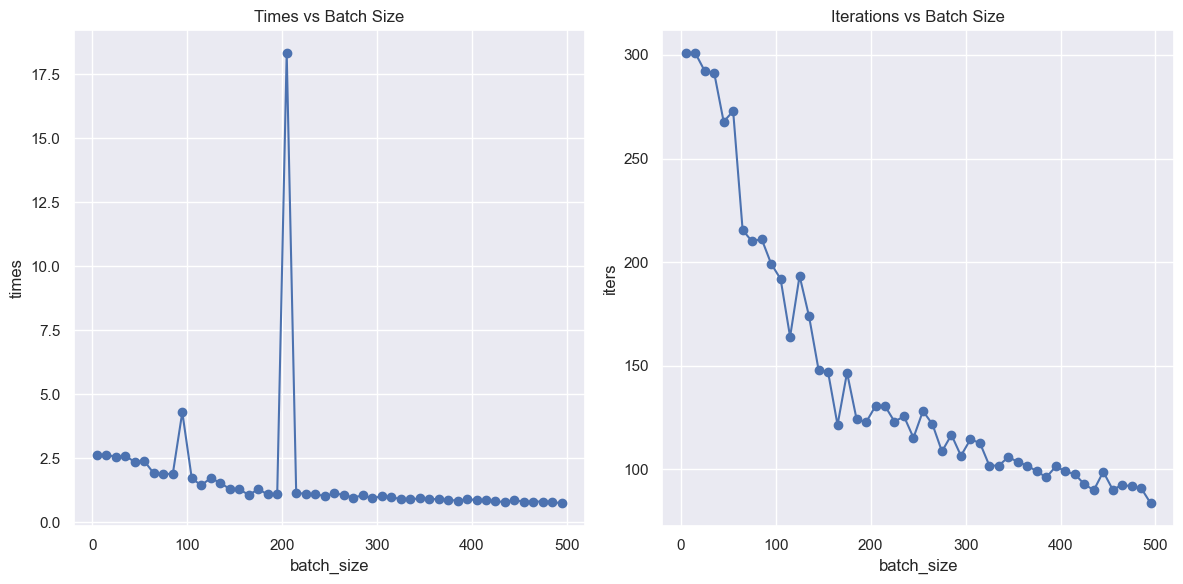

In [365]:
x = batch_sizes
y1 = times
y2 = iters

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, y1, marker='o')
plt.xlabel('batch_size')
plt.ylabel('times')
plt.title('Times vs Batch Size')

plt.subplot(1, 2, 2)
plt.plot(x, y2, marker='o')
plt.xlabel('batch_size')
plt.ylabel('iters')
plt.title('Iterations vs Batch Size')

plt.tight_layout()
plt.show()


In [366]:
last_seven_largest_batch_sizes = [batch_sizes[i] for i, time in enumerate(times) if time in sorted(times)[-7:]]
print("Размеры пакетов для последних 7 наибольших временных значений:", last_seven_largest_batch_sizes)

first_seven_batch_sizes = [batch_sizes[i] for i, time in enumerate(times) if time in sorted(times)[:7]]
print("Размеры пакетов для первых 7 временных значений:", first_seven_batch_sizes)


Размеры пакетов для последних 7 наибольших временных значений: [5, 15, 25, 35, 55, 95, 205]
Размеры пакетов для первых 7 временных значений: [425, 435, 455, 465, 475, 485, 495]


- Если размер выборки больше, то градиентный спуск будет вычисляться более точно, что позволит нам достичь точки минимума за меньшее количество итераций, избегая ненужных колебаний, однако, увеличение размера батча замедлит каждый шаг градиентного спуска. И тогда мы приходим к выводу, чтобы добится оптимальных результатов рекомендуется оценивать градиент по небольшой подвыборке. 

## Задание 7. Регуляризация (0.5 балла)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Вам предстоит исследовать, как настройка параметров обучения с включением регуляризации влияет на различные методы градиентного спуска. Основная цель — определить оптимальные значения для длины шага $\lambda$ и коэффициента регуляризации $\mu$, а затем сравнить результаты обучения с регуляризацией и без неё по нескольким критериям.

Ваш план действий следующий:

1. **Выбор параметров для подбора**: Установите диапазон значений для длины шага $\lambda$ и коэффициента регуляризации $\mu$. Используйте логарифмическую сетку для обоих параметров, чтобы обеспечить широкий охват потенциально оптимальных значений.

2. **Оптимизация и сравнение методов градиентного спуска**:
   - Произведите подбор параметров для каждого метода градиентного спуска, исследуя их влияние на процесс обучения.
   - Замерьте и сравните ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках, а также количество итераций до сходимости для моделей с регуляризацией и без неё.

3. **Визуализация результатов**:
   - Постройте для каждого метода графики, отображающие значения функции потерь (MSE) с регуляризацией и без неё на протяжении процесса обучения.

4. **Анализ результатов**:
   - Оцените, как регуляризация повлияла на сходимость методов.
   - Сравните качество моделей на обучающей и тестовой выборках с учетом регуляризации и без неё.
   - Проанализируйте, как изменения в длине шага и коэффициенте регуляризации отразились на итоговых результатах.

5. **Формулировка выводов**:
   - Сделайте выводы о влиянии регуляризации на процесс обучения и качество модели. Как регуляризация влияет на переобучение и обобщающую способность модели.
   - Рассмотрите, в каких случаях регуляризация приводит к улучшению результатов, и когда её вклад может быть минимальным или отрицательным.


In [367]:
all_lambda = np.logspace(-4, 1, 30)
all_mu = np.logspace(-10, 0.5, 30)
all_methods = ['full', 'stochastic', 'momentum', 'adam']

iters_reg = []

mu_for_methods = []
lambda_for_methods = []

r2_reg = []

all_mse_with = []
all_mse_without = []

for method_now in all_methods:
  best_r2 = -1000
  to_add_mu = 0
  to_add_lambda = 0

  mse_with = []
  mse_without = []

  r2_train_with = 0
  r2_test_with = 0
  r2_train_without = 0
  r2_test_without = 0
  r2_ = []

  iters_with = 0
  iters_without = 0
  iters_ = []


  for mu_now in all_mu:
    for lambda_now in all_lambda:

        descent_config = {
        'descent_name': method_now,
        'regularized': True,
        'kwargs': {
            'lambda_': lambda_now,
            'mu': mu_now,
            'dimension': X_val.shape[1]}}

        descent = get_descent(descent_config)
        regr = LinearRegression(descent_config=descent_config)
        regr.fit(X_val, y_val.to_numpy())
        pred = regr.predict(X_val)

        now_r2 = r2_score(y_val, pred)

        if (best_r2 == -1000) | (best_r2 < now_r2):
          best_r2 = now_r2
          to_add_lambda = lambda_now
          to_add_mu = mu_now
        
          iters_with = len(regr.loss_history)

          mse_with = regr.loss_history

          r2_train_with = r2_score(y_train, regr.predict(X_train))
          r2_test_with = r2_score(y_test, regr.predict(X_test))

          descent_config0 = {
          'descent_name': method_now,
          'kwargs': {
              'lambda_': lambda_now,
              'dimension': X_val.shape[1]}}

          descent0 = get_descent(descent_config0)
          regr0 = LinearRegression(descent_config=descent_config0)
          regr0.fit(X_val, y_val.to_numpy())

          iters_without = len(regr0.loss_history)

          r2_train_without = r2_score(y_train, regr0.predict(X_train))
          r2_test_without = r2_score(y_test, regr0.predict(X_test))

          mse_without = regr0.loss_history

  lambda_for_methods.append(to_add_lambda)
  mu_for_methods.append(to_add_mu)

  all_mse_with.append(mse_with)
  all_mse_without.append(mse_without)

  r2_.append(r2_train_with)
  r2_.append(r2_test_with)
  r2_.append(r2_train_without)
  r2_.append(r2_test_without)
  r2_reg.append(r2_)

  iters_.append(iters_with)
  iters_.append(iters_without)
  iters_reg.append(iters_)

In [368]:
methods = ['full', 'stochastic', 'momentum', 'adam']
print('Значение метрик R² и R2_reg для различных методов обучения:')
for method in methods:
  print(method)
  print('r2_train_with_reg = ', r2_reg[methods.index(method)][0])
  print('r2_train_without_reg = ', r2[methods.index(method) * 2])
  print('r2_test_with_reg = ', r2_reg[methods.index(method)][1])
  print('r2_test_without_reg = ', r2[methods.index(method) * 2 + 1])
  print('')


Значение метрик R² и R2_reg для различных методов обучения:
full
r2_train_with_reg =  0.7679000725047198
r2_train_without_reg =  0.7630206586145614
r2_test_with_reg =  0.7694783782023926
r2_test_without_reg =  0.7646979303277247

stochastic
r2_train_with_reg =  0.7620111671567433
r2_train_without_reg =  0.7527666120457261
r2_test_with_reg =  0.7648124771181695
r2_test_without_reg =  0.7537704655681241

momentum
r2_train_with_reg =  0.7709922842056622
r2_train_without_reg =  0.7673667628792934
r2_test_with_reg =  0.7727464263264825
r2_test_without_reg =  0.7690179824135688

adam
r2_train_with_reg =  0.7738426930944745
r2_train_without_reg =  0.773554003518784
r2_test_with_reg =  0.7756896226154915
r2_test_without_reg =  0.7754111666927426



In [369]:
methods = ['full', 'stochastic', 'momentum', 'adam']

for method in methods:
  print(method)
  print('iters_with_reg = ', iters_reg[methods.index(method)][0])
  print('iters_without_reg = ', iters[methods.index(method)])
  print('')

full
iters_with_reg =  80
iters_without_reg =  301.0

stochastic
iters_with_reg =  301
iters_without_reg =  301.0

momentum
iters_with_reg =  145
iters_without_reg =  292.3

adam
iters_with_reg =  126
iters_without_reg =  291.40000000000003



In [370]:
print (lambda_for_methods)

[3.039195382313201, 0.9236708571873865, 2.043359717856944, 10.0]


In [371]:
print (mu_for_methods)

[4.1753189365604003e-07, 2.2122162910704504e-06, 1.8139306939110632e-07, 6.210169418915616e-05]


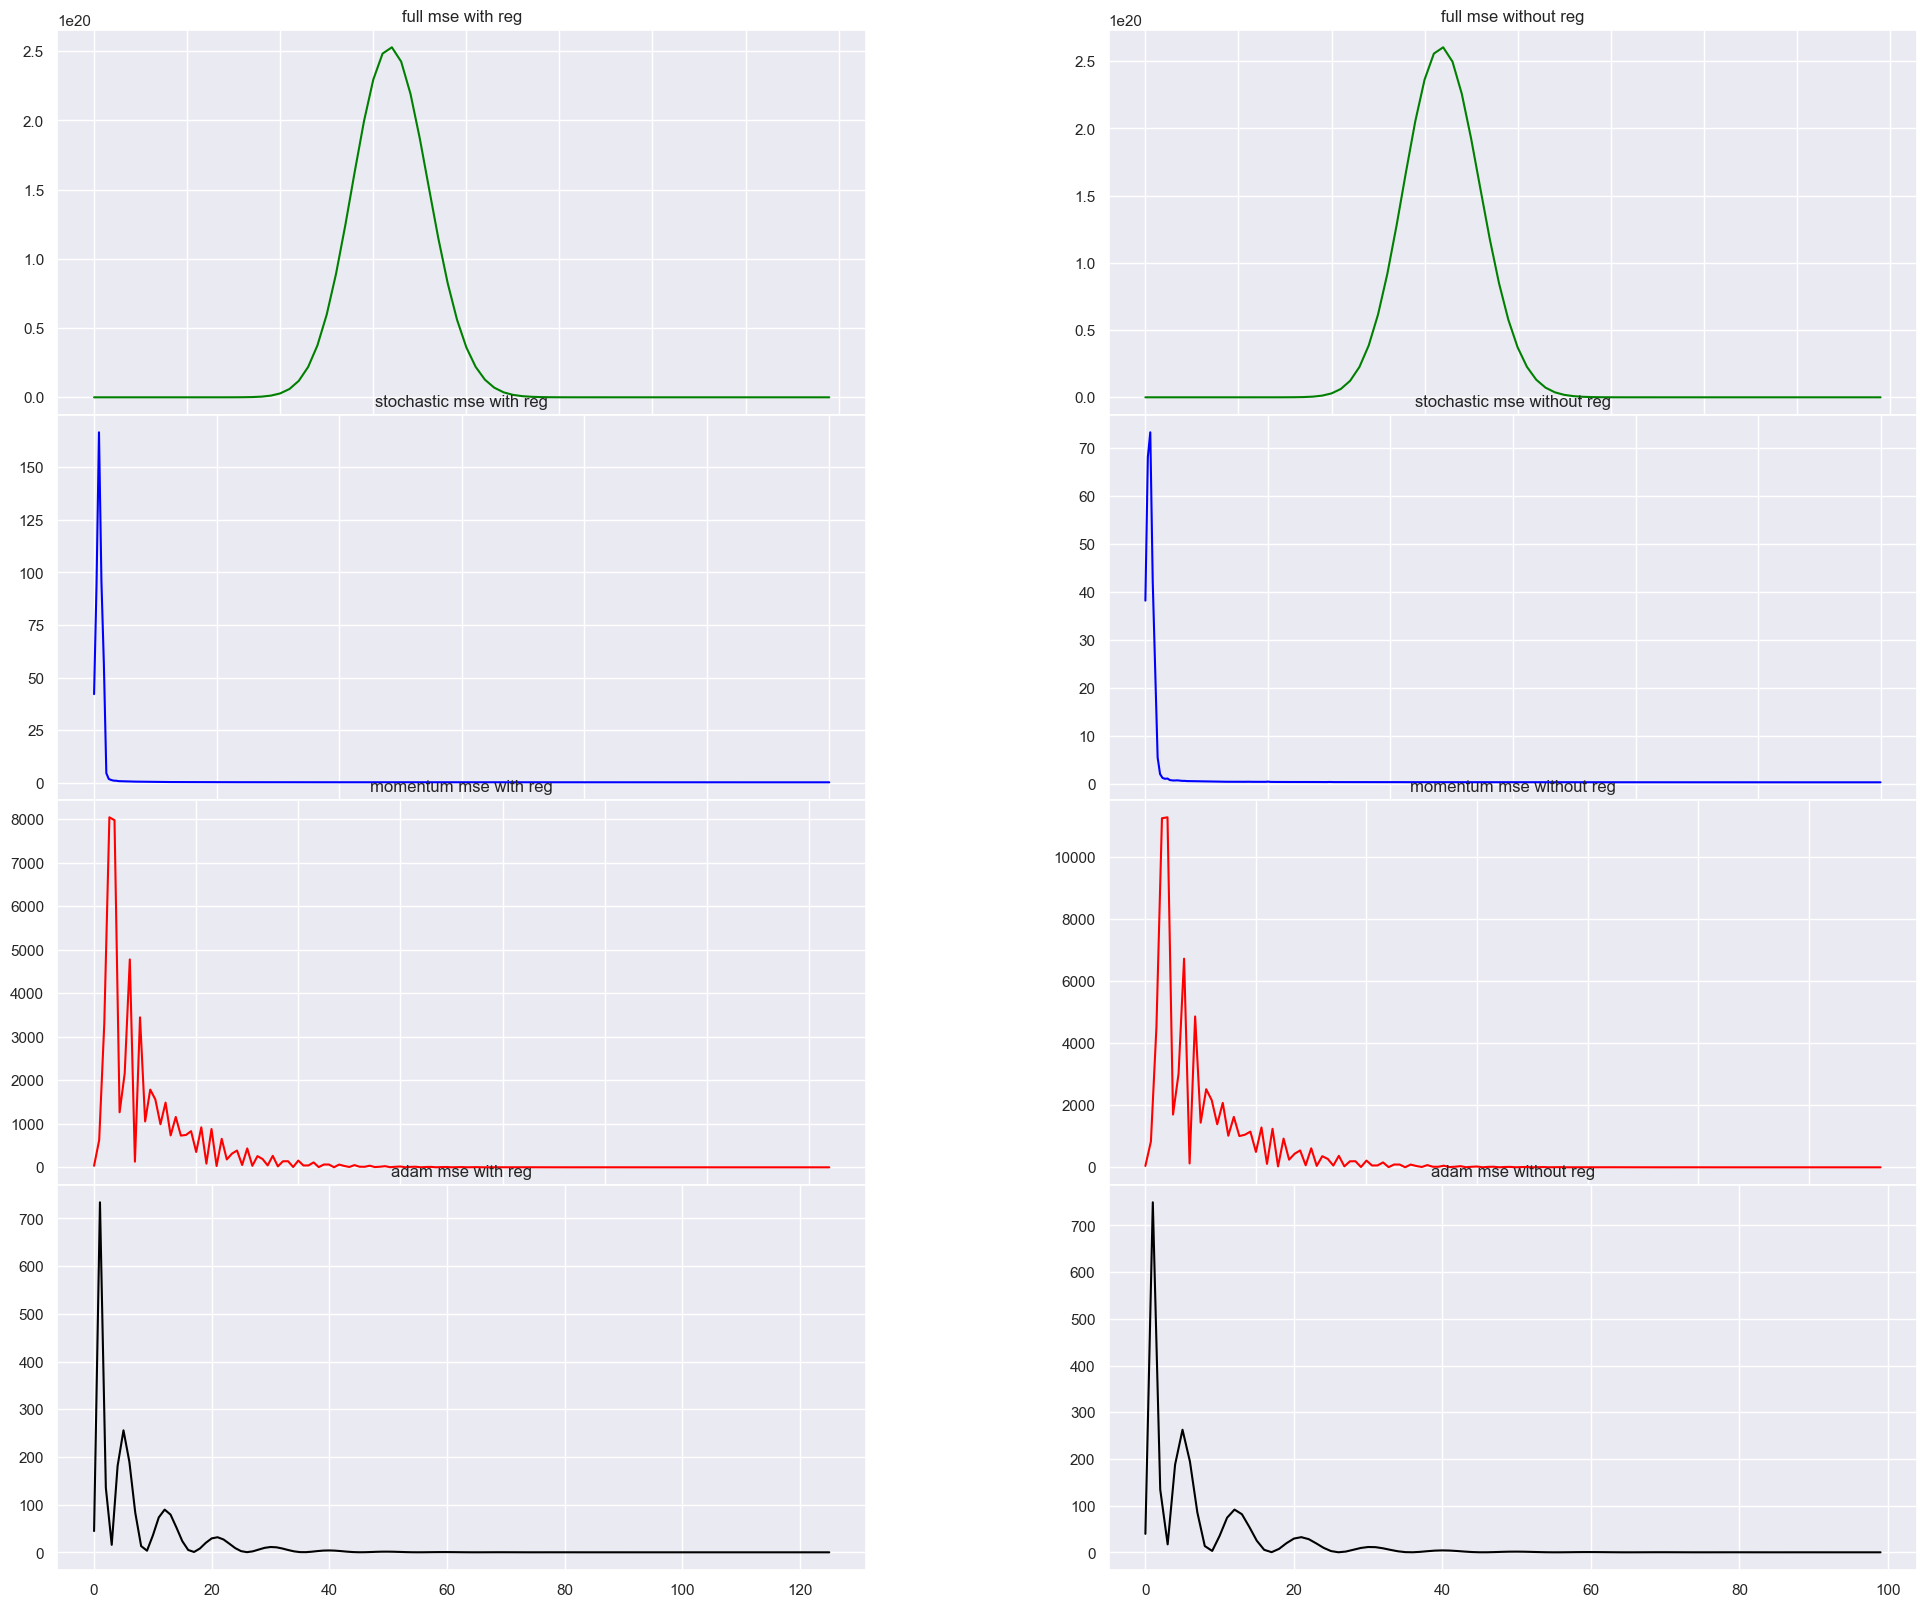

In [372]:
methods = ["full", "stochastic", "momentum", "adam"]
reg_suffix = ["with reg", "without reg"]
colors = ['green', 'blue', 'red', 'black'] 

fig, ax = plt.subplots(4, 2, figsize=(24, 20))
plt.subplots_adjust(wspace=0.3, hspace=0)

for i, method in enumerate(methods):
    for j, reg in enumerate(reg_suffix):
        ax[i, j].plot(all_mse_with[i] if reg == "with reg" else all_mse_without[i], color=colors[i])
        ax[i, j].set_title(f"{method} mse {reg}")

plt.show()

- Качество по метрике R2 с регуляризацией и без нее практически одинаково.
- При обучении модели на большом наборе данных, регуляризация может быть излишней и даже ухудшить качество модели, уменьшив величину важных коэффициентов.

## Задание 8. Альтернативная функция потерь (0.5 балла)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log({cosh{(a - y)}}).
$$


Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:



- Градиент будет выглядеть так 
$$
    L'(y, a)
    =
    \tanh(a - y)  X^T.
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [373]:
r2 = []  

r2_logcosh = []
iters_logcosh = []
lambda_for_methods_lc = []
all_errs_lc = []
to_add = all_lambda[0]
all_methods = ['full', 'stochastic', 'momentum', 'adam']
for method_now in all_methods:
  best_r2 = -1000
  best_r2_train = 0
  best_r2_test = 0
  best_iters = 301
  loss = []
  for lambda_now in all_lambda:
      descent_config = {
      'descent_name': method_now,
      'kwargs': {
          'lambda_': lambda_now,
          'loss_function': 'LogCosh',
          'dimension': X_val.shape[1]}}
      descent = get_descent(descent_config)
      regr = LinearRegression(descent_config=descent_config)
      regr.fit(X_val, y_val.to_numpy())
      now_r2 = r2_score(y_val, regr.predict(X_val))
      if (best_r2 == -1000) | (best_r2 < now_r2):
        best_r2_train = r2_score(y_train, regr.predict(X_train)) 
        best_r2_test = r2_score(y_test, regr.predict(X_test)) 
        best_iters = len(regr.loss_history) 
        to_add = lambda_now
        best_r2 = now_r2
        loss = regr.loss_history
  r2.append(best_r2_train)  
  r2.append(best_r2_test)  
  lambda_for_methods_lc.append(to_add)
  r2_logcosh.append(best_r2_train)
  r2_logcosh.append(best_r2_test)
  iters_logcosh.append(best_iters)
  all_errs_lc.append(loss)


In [374]:
methods = ['full', 'stochastic', 'momentum', 'adam']
for i in range(0, 8, 2):
    method = methods[i // 2]
    print(method)
    print(f"r2_train mse = {r2[i]}")
    print(f"r2_train logcosh = {r2_logcosh[i]}")
    print(f"r2_test mse = {r2[i + 1]}")
    print(f"r2_test logcosh = {r2_logcosh[i + 1]}")
    print()


full
r2_train mse = 0.7648501251313213
r2_train logcosh = 0.7648501251313213
r2_test mse = 0.7665786569163269
r2_test logcosh = 0.7665786569163269

stochastic
r2_train mse = 0.7534776342224403
r2_train logcosh = 0.7534776342224403
r2_test mse = 0.7549508009368133
r2_test logcosh = 0.7549508009368133

momentum
r2_train mse = 0.7699591357412242
r2_train logcosh = 0.7699591357412242
r2_test mse = 0.7714479567493224
r2_test logcosh = 0.7714479567493224

adam
r2_train mse = 0.7739084798340172
r2_train logcosh = 0.7739084798340172
r2_test mse = 0.7758178825066439
r2_test logcosh = 0.7758178825066439



In [375]:
print('Количество итераций до сходимости:')
print('')
methods = ['full', 'stochastic', 'momentum', 'adam']
for i, method in enumerate(methods):
    print(f'{method} mse:', iters[i])
    print(f'{method} logcosh:', iters_logcosh[i])
    print('')


Количество итераций до сходимости:

full mse: 301.0
full logcosh: 80

stochastic mse: 301.0
stochastic logcosh: 297

momentum mse: 292.3
momentum logcosh: 113

adam mse: 291.40000000000003
adam logcosh: 95



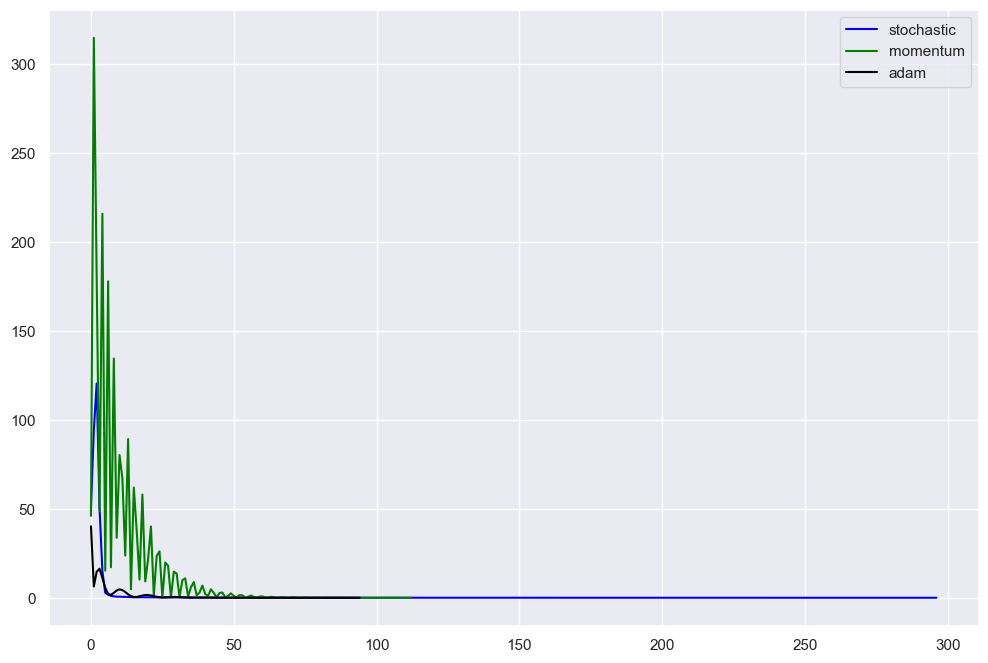

In [376]:
plt.figure(figsize=(12,8))
plt.plot(all_errs_lc[1], color='blue', label='stochastic')
plt.plot(all_errs_lc[2], color='green', label='momentum')
plt.plot(all_errs_lc[3], color='black', label='adam')
plt.legend()

- Log-Cosh более устойчива к выбросам, гладкая и способствует более быстрой сходимости, что делает её более лучшим выбором в сравнении с MSE